# Installation

This third-party package is directly available via pip, so no extra setup required.

Only the following package is needed:

In [1]:
!pip install gportal

   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   -------------------------- ------------- 2.4/3.5 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 11.5 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pycparser]
   ----------- ---------------------------- 2/7 [cffi]
   ----------------- ---------------------- 3/7 [pynacl]
   ---------------------- ----------------- 4/7 [cryptography]
   ---------------------- ----------------- 4/7 [cryptography]
   ---------------------------- ----------- 5/7 [paramiko]
   ---------------------------- ----------- 5/7 [paramiko]
   ---------------------------------- ----- 6/7 [gportal]
   ---------------------------------------- 7/7 [gportal]



## Inspect the dataset List available in G-Portal

Searching the available datasets does not yet require a G-Portal registration, so this can be done without logging in. The following cell gives a complete overview over all available datasets (satellites, levels, and sensors).

In [9]:
import gportal

# Get the dictionary of the G-Portal dataset.
# It corresponds to the "spacecraft/sensor" search tree of the Web UI.
datasets = gportal.datasets()
datasets

{'GCOM-C/SGLI': {'LEVEL1': {'L1A-Visible & Near Infrared, VNR': ['10001000'],
   'L1A-Visible & Near Infrared, POL': ['10001001'],
   'L1A-SWI & TIR': ['10001002'],
   'L1B-Visible & Near Infrared, VNR': ['10001003'],
   'L1B-Visible & Near Infrared, POL': ['10001004'],
   'L1B-SWI & TIR': ['10001005']},
  'LEVEL2': {'Oceanic sphere': {'L2-NWLR ': ['10002000'],
    'L2-IWPR': ['10002001'],
    'L2-SST': ['10002002']},
   'Cryosphere': {'L2-OKID': ['10002003'],
    'L2-SICE': ['10002005', '10002004'],
    'L2-SIPR': ['10002076', '10002075'],
    'L2-SIPR ver.2': ['10002007', '10002006']},
   'Cryosphere statistics': {'L2 statistics-SICE': ['10002009', '10002008'],
    'L2 statistics-SIST': ['10002010'],
    'L2 statistics-SGSL': ['10002011'],
    'L2 statistics-SALB': ['10002077']},
   'Land area': {'L2-LTOA': ['10002014', '10002013', '10002012'],
    'L2-RSRF': ['10002015'],
    'L2-VGI': ['10002016'],
    'L2-LAI': ['10002017'],
    'L2-AGB': ['10002018'],
    'L2-LST': ['10002019']},

In this list, the source dataset of that available through the JAXA Earth API is present:

In [2]:
{'GSMaP': {'LEVEL3': {'GSMaP Precipitation(Hourly HDF)': ['14003000'],
   'GSMaP Precipitation(Hourly TEXT)': ['14003001'],
   'GSMaP Precipitation(Monthly HDF)': ['14003004']}},}

{'GSMaP': {'LEVEL3': {'GSMaP Precipitation(Hourly HDF)': ['14003000'],
   'GSMaP Precipitation(Hourly TEXT)': ['14003001'],
   'GSMaP Precipitation(Monthly HDF)': ['14003004']}}}

Specify dataset to be downloaded:

In [11]:
res = gportal.search(
    dataset_ids=datasets["GSMaP"]["LEVEL3"]["GSMaP Precipitation(Hourly HDF)"],
    start_time="2024-05-01T00:00:00",
    end_time="2024-05-01T04:00:00",
    bbox=[-180, -90, 180, 90],
    params={
        # You can add more parameters.
        # See Appendix 7 of G-Portal User's Manual for more details:
        # https://gportal.jaxa.jp/gpr/assets/mng_upload/COMMON/upload/GPortalUserManual_en.pdf
    },
)

print(f"Will download {res.matched()} files.")
products = res.products()

Will download 10 files.


## Download

Initiate download, will be saved as multiple (as many as indivdual matches were found) .h5 files.
For the below step, a legitimate username and password need to be provided.

The data will be stored at the provided path.

In [13]:
gportal.username = ""  
gportal.password = ""
gportal.download(products, local_dir="../data")

['../data\\GPMMRG_MAP_2405010100_H_L3S_MCH_04J.h5',
 '../data\\GPMMRG_MAP_2405010000_H_L3S_MCH_04J.h5',
 '../data\\GPMMRG_MAP_2405010300_H_L3S_MCH_04J.h5',
 '../data\\GPMMRG_MAP_2405010200_H_L3S_MCH_04J.h5',
 '../data\\GPMMRG_MAP_2405010400_H_L3S_MCH_04J.h5',
 '../data\\GPMMRG_MAP_2405010200_H_L3S_MCH_05C.h5',
 '../data\\GPMMRG_MAP_2405010100_H_L3S_MCH_05C.h5',
 '../data\\GPMMRG_MAP_2405010300_H_L3S_MCH_05C.h5',
 '../data\\GPMMRG_MAP_2405010400_H_L3S_MCH_05C.h5',
 '../data\\GPMMRG_MAP_2405010000_H_L3S_MCH_05C.h5']

### Load from file


In [19]:
import h5py


filename = "../data\\GPMMRG_MAP_2405010100_H_L3S_MCH_04J.h5"
with h5py.File(filename, "r") as f:
    f.visit(print)

Grid
Grid/Latitude
Grid/Longitude
Grid/gaugeQualityInfo
Grid/hourlyPrecipRate
Grid/hourlyPrecipRateGC
Grid/observationTimeFlag
Grid/satelliteInfoFlag
Grid/snowProbability


In [35]:
with h5py.File(filename, "r") as f:
    lat = f["Grid/Latitude"][:].T
    lon = f["Grid/Longitude"][:].T
    precip = f["Grid/hourlyPrecipRate"][:].T

In [36]:
lat.shape, lon.shape, precip.shape

((1800, 3600), (1800, 3600), (1800, 3600))

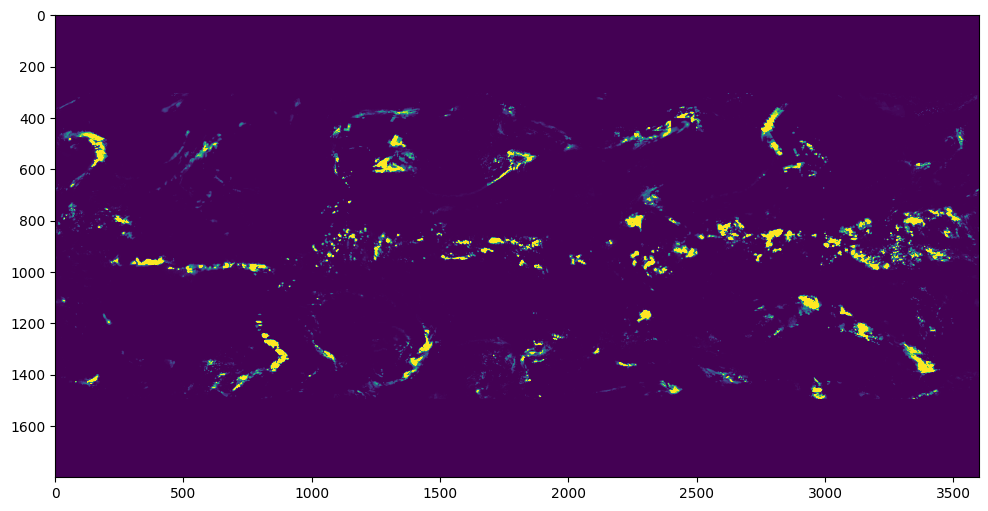

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
im = plt.imshow(
    precip,
    vmin=0,
    vmax=np.nanpercentile(precip, 99),
    )